Current directory: /home/alitonia/.config/JetBrains/DataSpell2025.2/projects/workspace/code/explore
Data path: /home/alitonia/.config/JetBrains/DataSpell2025.2/projects/workspace/code/explore/../../data/kaggle-archive/AEP_hourly.csv
Statistics for AEP_MW:
Mean: 15499.51 MW
Median: 15310.00 MW
Min: 9581.00 MW
Max: 25695.00 MW
Std Dev: 2591.40 MW


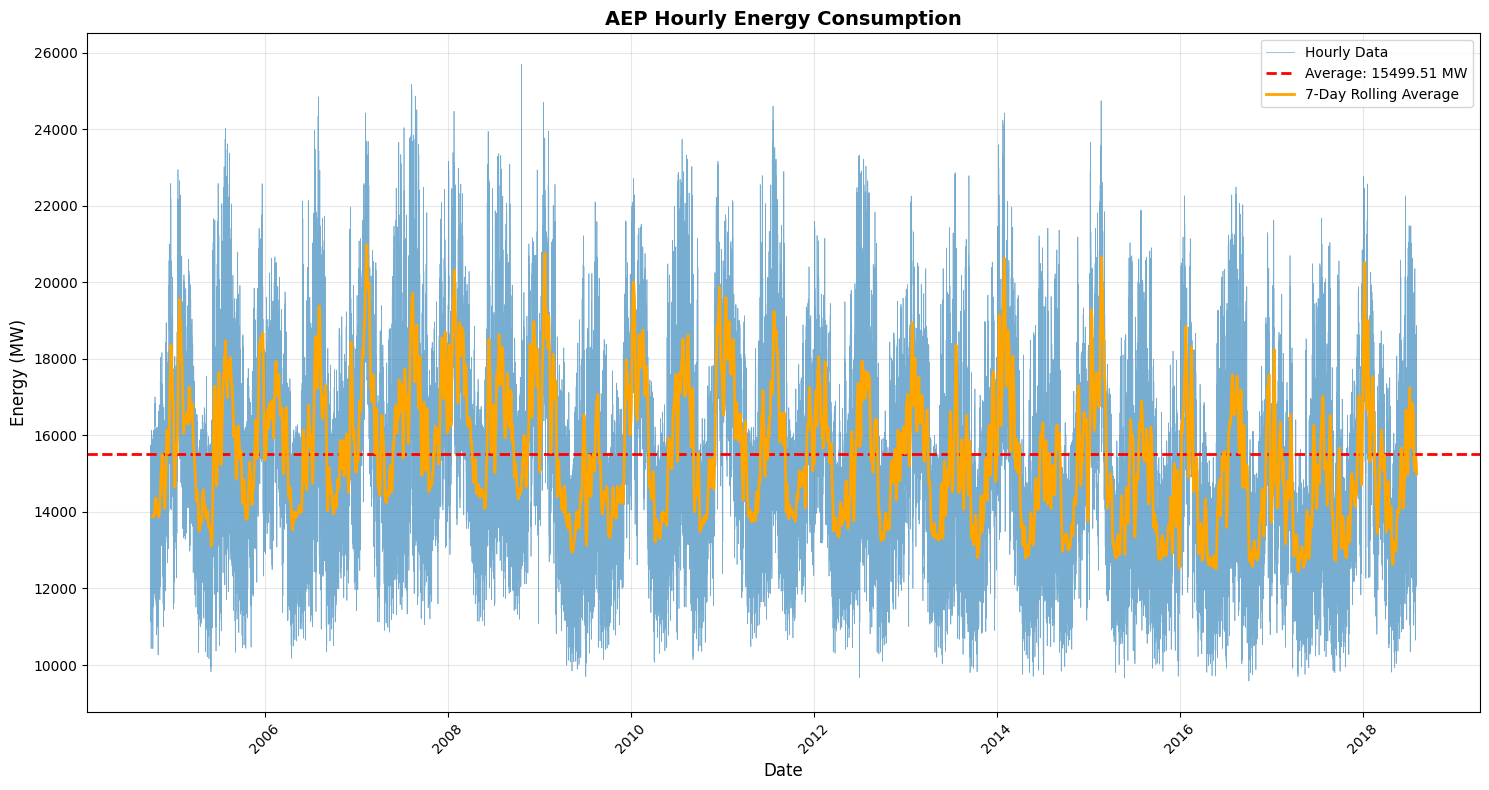

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

relative_data_path = '../../data/kaggle-archive/AEP_hourly.csv'
# current executable directory
current_dir = os.getcwd()
# join the current directory and data path
data_path = os.path.join(current_dir, relative_data_path)

print(f"Current directory: {current_dir}")
print(f"Data path: {data_path}")

# Build absolute path

df = pd.read_csv(data_path)

# Convert Datetime column to datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Sort by datetime
df = df.sort_values('Datetime')

# Calculate statistics
average = df['AEP_MW'].mean()
rolling_avg = df['AEP_MW'].rolling(window=24*7).mean()  # 7-day rolling average

# Create the plot
plt.figure(figsize=(15, 8))

# Plot the main data
plt.plot(df['Datetime'], df['AEP_MW'], label='Hourly Data', alpha=0.6, linewidth=0.5)

# Plot average line
plt.axhline(y=average, color='r', linestyle='--', label=f'Average: {average:.2f} MW', linewidth=2)

# Plot rolling average
plt.plot(df['Datetime'], rolling_avg, label='7-Day Rolling Average', color='orange', linewidth=2)

# Formatting
plt.xlabel('Date', fontsize=12)
plt.ylabel('Energy (MW)', fontsize=12)
plt.title('AEP Hourly Energy Consumption', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# Display statistics
print(f"Statistics for AEP_MW:")
print(f"Mean: {average:.2f} MW")
print(f"Median: {df['AEP_MW'].median():.2f} MW")
print(f"Min: {df['AEP_MW'].min():.2f} MW")
print(f"Max: {df['AEP_MW'].max():.2f} MW")
print(f"Std Dev: {df['AEP_MW'].std():.2f} MW")

plt.show()
